# Analyse game experience data

In [12]:
!pip install pandas matplotlib numpy

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -------------------------------------- - 7.6/7.8 MB 39.0 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 37.0 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 62.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 49.0 MB/s eta 0:00:00
Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)


In [26]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

path = 'game_experience.txt'

In [14]:
def load_experience_from_file(path:str):
    if os.path.exists(path):
        return pd.read_csv(path)
    else:
        return pd.DataFrame(columns=['board_state', 'mcts_prob', 'z_value'])

dataset = load_experience_from_file(path)

In [15]:
dataset.head()

,board_state,mcts_prob,z_value
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, ...","[[0.007385524372230428, 0.005908419497784343, ...",1
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, ...","[[0.0045871559633027525, 0.013761467889908258,...",-1
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, ...","[[0.004580152671755725, 0.00916030534351145, 0...",1
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, ...","[[0.0056022408963585435, 0.011204481792717087,...",-1
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, ...","[[0.0065040650406504065, 0.011382113821138212,...",1


In [ ]:
def plot_heatmap(data, title):
    plt.figure(figsize=(8, 8))
    plt.imshow(data, cmap='hot', interpolation='nearest')
    plt.colorbar()  # Add a colorbar for reference
    plt.title(title)
    plt.show()

# Bias in win loss dataset

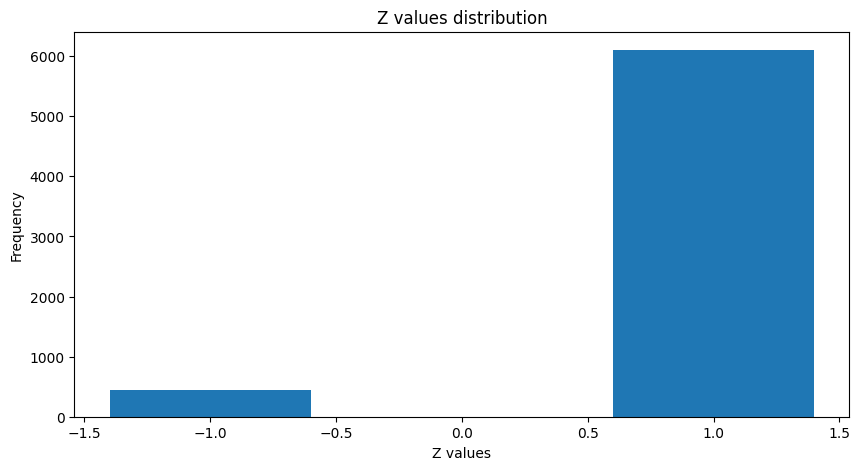

In [ ]:
z_values = dataset['z_value']

# Plotting the z_values
plt.figure(figsize=(10, 5))
plt.bar(z_values.value_counts().index, z_values.value_counts().values)
plt.title('Z values distribution')
plt.xlabel('Z values')
plt.ylabel('Frequency')
plt.show()

# Tile Selection Distiburion

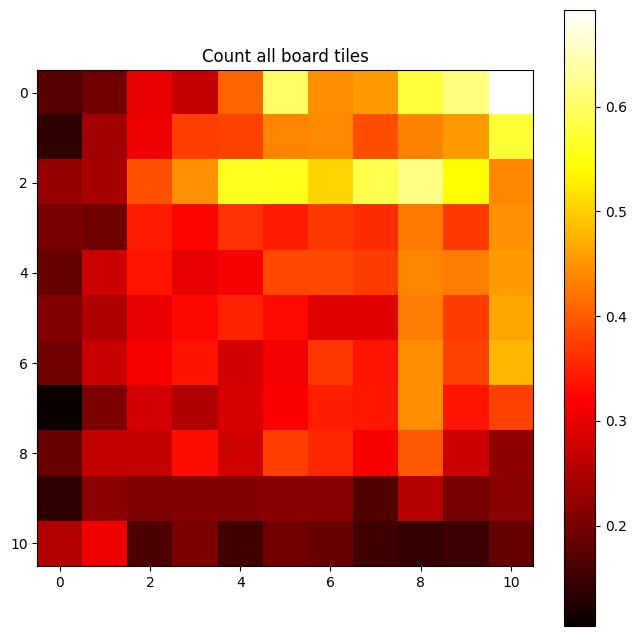

In [41]:
selected_tiles = dataset['board_state'].apply(ast.literal_eval).tolist()

# set all -1 to 1
for record in selected_tiles:
    for i in range(11):
        for j in range(11):
            if record[i][j] == -1:
                record[i][j] = 1

plot_heatmap(np.array(selected_tiles).mean(axis=0), 'Count all board tiles')


# MCTS Probs of all games

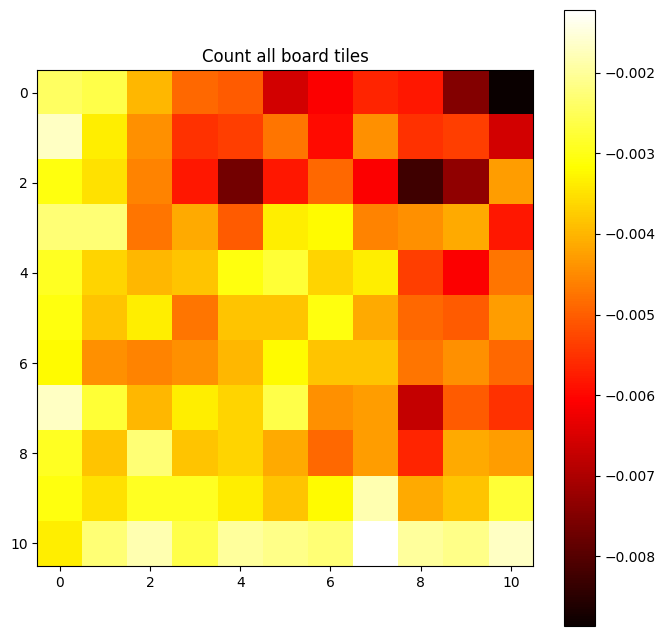

In [42]:
mcts_probs = dataset['board_state'].apply(ast.literal_eval).tolist()

plot_heatmap(np.array(mcts_probs).mean(axis=0), 'Count all board tiles')

# MCTS Probs last 2000 games

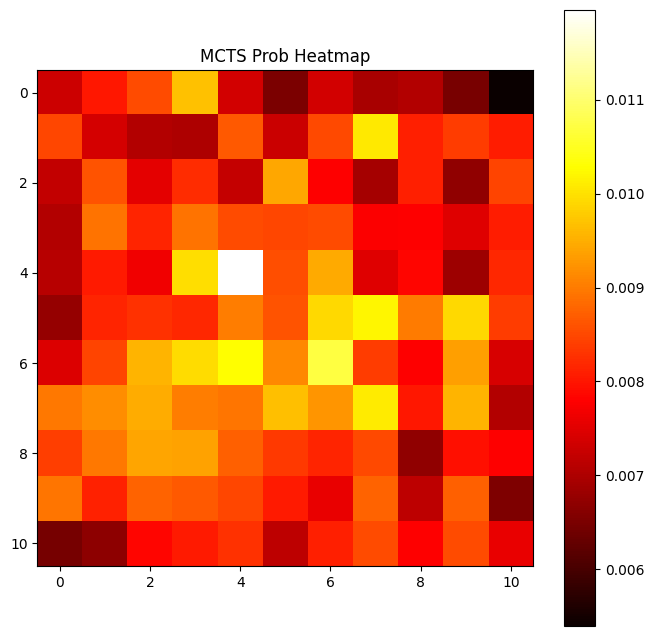

In [39]:
mcts_probs = dataset['mcts_prob'].apply(ast.literal_eval).tolist()

plot_heatmap(np.array(mcts_probs[:-2000]).mean(axis=0), 'MCTS Prob Heatmap')